## Putting it together!

At the 1976 Pro Bowl, Ray Guy, of the Oakland Raiders, kicked a ball that hung in the air long enough for officials to wonder whether the it was filled with helium. The ball was found to be filled with air, but since then many have tossed around the idea that a helium-filled football would outdistance an air-filled one. Students at Ohio State University conducted an experiment to test this myth. They used two identical footballs, one air filled with air and one filled with helium. Each football was kicked 39 times and the two footballs were alternated with each kick.

Read the helium.txt (tab separated, again from [OpenIntro](https://www.openintro.org/)) file from the data folder. Create histograms and boxplots for these data using either ```matplotlib.pyplot``` or ```seaborn```. Comment on whether there are outliers or not. Carry out a statistical test (either $t$-test or Mann-Whitney to decide if there is a statistically significant difference in the average height for the two balls. 

As a statistical aside - do you think these data should be analysed as independent samples or as paired data? The ```scipy.stats``` function for a paired $t$-test is [stats.ttest_rel](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html).

Hint: Data can be in [wide or long](https://en.wikipedia.org/wiki/Wide_and_narrow_data) format. In wide format there is a separate column for each data variable i.e. there can be more than one value column.

e.g.

| trial | air | helium |
|-------|-----|--------|
| 1     | 25  | 25     |
| 2     | 23  | 16     |
| 3     | 18  | 25     |
| 4     | 16  | 14     |
| 5     | 35  | 23     |

In wide format each row may contain several observations. In the example above each row contains observations for 'air' and 'helium'.

In long format there is only one value column and the other columns give the context of the value i.e. whether it's from an air or helium trial.

e.g.

| trial | variable | value |
|-------|----------|-------|
| 1     | helium   | 25    |
| 2     | helium   | 16    |
| 3     | helium   | 25    |
| 4     | helium   | 14    |
| 5     | helium   | 23    |
| 1     | air      | 25    |
| 2     | air      | 23    |
| 3     | air      | 18    |
| 4     | air      | 16    |
| 5     | air      | 35    |

In the latter format each row corresponds to one and only one observed value.

To generate the plots in this exercise you should convert the data from wide to long format. In general this format makes it easier to split data by variables. The ```pandas``` [```melt()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) method allows us to do this - it 'melts' the data. For our purposes you only need to supply the ```id_vars``` argument telling ```melt()``` which variable identifies each row.

e.g.
```python
heliumM = pd.melt(helium, id_vars=('trial'))
```

   trial  air  helium
0      1   25      25
1      2   23      16
2      3   18      25
3      4   16      14
4      5   35      23
   trial variable  value
0      1      air     25
1      2      air     23
2      3      air     18
3      4      air     16
4      5      air     35


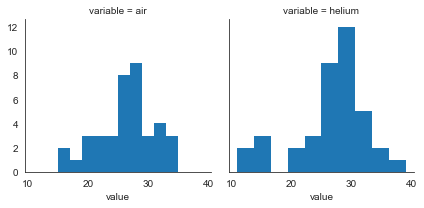

In [1]:
# import libraries etc
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") # set a style for plot, nice and simple here
# so we can see plots in notebook
% matplotlib inline 

# get the data into a pandas DataFrame
helium = pd.read_csv('data/helium.txt', sep='\t')
print(helium.head()) # uh, oh... better in long format so condition (helium, air) is in one column
# so 'melt' the data
heliumM = pd.melt(helium, id_vars=('trial'))
print(heliumM.head()) # ah, that's better
# create a grid to throw plots onto by variable (air, helium)
g = sns.FacetGrid(heliumM, col='variable')
# map a histogram to each 'space'
g.map(plt.hist, 'value', lw=0)
plt.show()

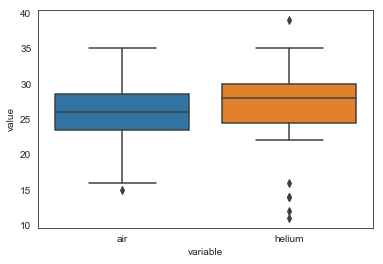

In [2]:
# box and whisker plots
sns.boxplot(x='variable', y='value', data=heliumM)
plt.show()

In [3]:
# the stats
helium_vals = heliumM[heliumM['variable']=='helium']['value'] # get values for each condition
air_vals = heliumM[heliumM['variable']=='air']['value']

# unpaired t test
unpaired_res = stats.ttest_ind(helium_vals, air_vals) # tuple, t-stat and p-value
print("The unpaired t-statistic is %.2f with a p-value of %.3f." % (unpaired_res[0], unpaired_res[1]))

# paired t test
paired_res = stats.ttest_rel(helium_vals, air_vals) # tuple, t-stat and p-value
print("The paired t-statistic is %.2f with a p-value of %.3f." % (paired_res[0], paired_res[1]))

# mann whitney
mw_test = stats.ranksums(helium_vals, air_vals) # tuple, z-value and p-value
print("The p-value for the MW test is %.3f." % mw_test[1])

The unpaired t-statistic is 0.37 with a p-value of 0.712.
The paired t-statistic is 0.42 with a p-value of 0.677.
The p-value for the MW test is 0.361.


So there is no significant difference between an air filled and a helium filled 'pigskin' in height reached after a kick.

### Plots with ```matplotlib.pyplot``` via ```pandas```

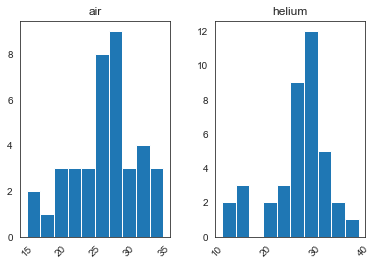

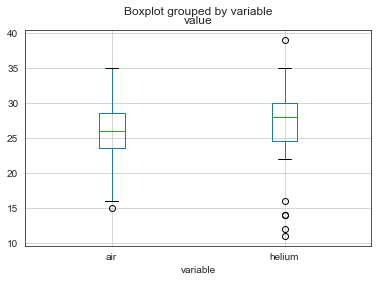

In [4]:
# matplotlib.pyplot and pandas
heliumM.hist(column='value', by=heliumM['variable'], grid=False, bins=10, rot=45)
plt.show()
heliumM.boxplot(column='value', by='variable')
plt.show()

## Homework 1

The energy.txt file (from the R package [ISwR](https://cran.r-project.org/web/packages/ISwR/index.html), but originally from [Practical Statistics for Medical Research](http://www.amazon.co.uk/Practical-Statistics-Medical-Research-Statistical/dp/0412276305)) contains data on energy expenditure (in MJ) and stature (obese or lean) from 22 women. 

Read the data into a ```pandas``` dataframe. 

How many are in each group? Create boxplots of this data by stature. Comment on these boxplots - i.e. what do you see? 

Examine the data for normality by creating histograms for each group. 

Print the mean energy expenditure for each group and create barplots with error bars showing the standard error (```ci=68```) of the mean energy expenditure for each group. 

Finally carry out a statistical test (you can choose $t$-test or MW test depending on your interpretation of the histograms) to examine whether mean energy expenditure is the same in each group.

lean     13
obese     9
Name: stature, dtype: int64


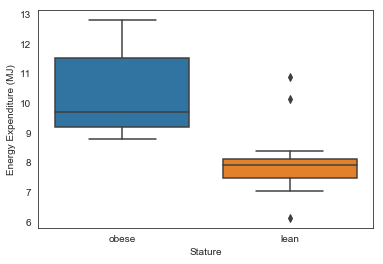

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

energy = pd.read_csv('data/energy.txt', sep='\t')
print(energy['stature'].value_counts())

sns.boxplot(x='stature', y='expend', data=energy)
plt.xlabel('Stature')
plt.ylabel('Energy Expenditure (MJ)')
plt.show()

The energy expenditure in the obese women is considerably higher than in the lean women and the data for the obese women is also more variable. There are however a few outliers in the lean data.

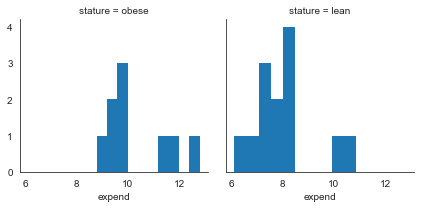

In [6]:
# histograms from normality
g = sns.FacetGrid(energy, col='stature')
g.map(plt.hist, 'expend', lw=0)
plt.show()

From the histograms we see that these data are not particularly normal so we will use the Mann-Whitney test here.

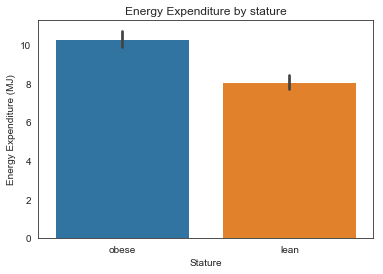

The mean energy expenditure in lean women is 8.1MJ and the mean energy expenditure in obese women is 10.3MJ.
The p-value for the difference in mean energy expenditure is 0.0019.


In [7]:
# barplots
sns.barplot(x='stature', y='expend', data=energy, ci=68)
plt.xlabel('Stature')
plt.ylabel('Energy Expenditure (MJ)')
plt.title('Energy Expenditure by stature')
plt.show()

group_mns = energy.groupby('stature')['expend'].mean()
#group_means = data_in.groupby('Gender')['Time'].mean()

print('The mean energy expenditure in lean women is %.1fMJ and the mean energy expenditure in obese women is %.1fMJ.' \
% (group_mns[0], group_mns[1]))

ob_data = energy[energy['stature']=='obese']['expend']
ln_data = energy[energy['stature']=='lean']['expend']
mw_res = stats.ranksums(ob_data, ln_data)
print('The p-value for the difference in mean energy expenditure is %.4f.' % mw_res[1])

## Homework 2 - optional

The energy_intake.txt file, also originally from [Practical Statistics for Medical Research](http://www.amazon.co.uk/Practical-Statistics-Medical-Research-Statistical/dp/0412276305), contains paired data on the energy intake of 11 women pre and post menstruation. When we have two continuous variables like this we are often interested in the relationship between the variables and we might expect that pre and post energy intake would demonstrate a linear relationship. 

In this exercise you should read the data into a ```pandas``` dataframe from the data folder and generate a scatter plot with a line of best fit. Scatter plots are ideal for visualising the relationship between continuous variables. Above we used the ```seaborn.lmplot()``` function but set the argument that generates a best fit line to ```False```. In this exercise you will have to include set this argument to ```True```. ```lmplot()``` also generates a confidence interval for the line (i.e. where the line could plausibly go if you repeated the experiment). You can keep this in or remove it from the plot depending on taste.

Once you have generated the plot you can examine the strength of the relationship between the pre and post energy intake levels. This is best done with the [```scipy.stats.linregress```](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) function. This function calculates the coefficients for the line of best fit (i.e. the slope and the intercept) but also returns the correlation coefficient (Pearsons' $\rho$ (rho)), a $p$-value to indicate whether the line is significantly different from zero or not. These are returned in a tuple (slope, intercept, Pearsons $\rho$, $p$-value, standard error for slope).

There is also a function to calculate only Pearsons $\rho$ and a $p$-value -  [```scipy.stats.pearsonr```](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.pearsonr.html). All you need to supply as arguments are the two variables you want the Pearson correlation for. This function returns a tuple containing the correlation coefficient and a $p$-value which tests whether the slope of the line is less than or greater than zero.

You should test whether the relationship between pre- and post energy intake is a significant one by testing whether the slope of the best fit line is significantly different from zero.  What do the test and the plot tell you about the pre- and post energy intakes?

Are the pre and post values different by Mann-Whitney Rank sum test?

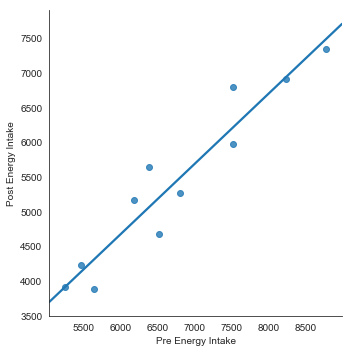

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import scipy.stats as stats
import seaborn as sns
sns.set_style('white')

energy_intake = pd.read_csv('data/energy_intake.txt', sep='\t')
energy_intake.head()
sns.lmplot(x='pre', y='post', data=energy_intake, ci=None)
plt.xlabel('Pre Energy Intake')
plt.ylabel('Post Energy Intake')
plt.show()

In [9]:
# is the slope significant?
energy_regress = stats.linregress(energy_intake['pre'], energy_intake['post'])
print('The slope of the line is %.2f, Pearsons r is %.2f and the pvalue is %.4f.' % \
(energy_regress[0], energy_regress[2], energy_regress[3]))

mw_test = stats.ranksums(energy_intake['pre'], energy_intake['post'])
print('The p-value for the difference between the means is %.4f.' % (mw_test[1]))

The slope of the line is 1.02, Pearsons r is 0.95 and the pvalue is 0.0000.
The p-value for the difference between the means is 0.0278.


Note that slope $p$-value above. If I was reporting that I'd report it as 'There was a signifincant linear relationship between pre and post energy intake ($p$<0.05).'